In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

#load the data
df=pd.read_excel('F:\\6th sem project\\EBL_data.xlsx')
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,
2013-09-29,1472.0,1478.0,1469.0,1469.0,-0.20 %,1867
2013-09-30,1469.0,1470.0,1460.0,1465.0,-0.27 %,2236
2013-10-01,1465.0,1466.0,1450.0,1450.0,-1.02 %,3367
2013-10-02,1450.0,1450.0,1439.0,1439.0,-0.76 %,6282
2013-10-03,1439.0,1460.0,1440.0,1460.0,1.46 %,717


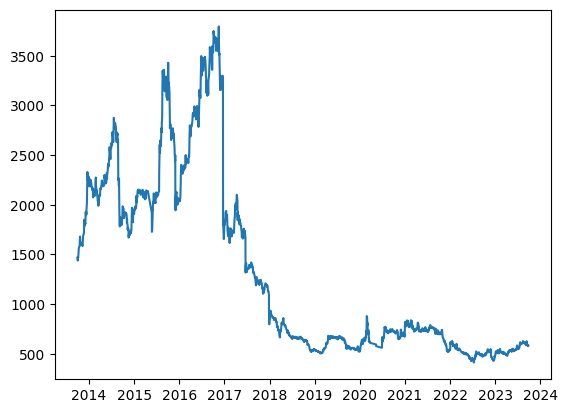

In [4]:
plt.plot(df.index,df['Close'])
plt.show()

In [5]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


In [6]:
  # Split the data into training and testing sets
to_row = int(len(df) * 0.9)
training_data = scaled_data[:to_row]
testing_data = scaled_data[to_row:]

In [12]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)



In [13]:
# Define the sequence length and create sequences
seq_length = 10
X_train, y_train = create_sequences(training_data, seq_length)
X_test, y_test = create_sequences(testing_data, seq_length)

In [14]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
64/64 [==============================] - 4s 9ms/step - loss: 0.0414
Epoch 2/50
64/64 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 3/50
64/64 [==============================] - 1s 9ms/step - loss: 9.7591e-04
Epoch 4/50
64/64 [==============================] - 1s 10ms/step - loss: 8.8895e-04
Epoch 5/50
64/64 [==============================] - 1s 9ms/step - loss: 8.3517e-04
Epoch 6/50
64/64 [==============================] - 1s 9ms/step - loss: 7.8907e-04
Epoch 7/50
64/64 [==============================] - 1s 9ms/step - loss: 7.4752e-04
Epoch 8/50
64/64 [==============================] - 1s 9ms/step - loss: 7.1077e-04
Epoch 9/50
64/64 [==============================] - 1s 9ms/step - loss: 6.6309e-04
Epoch 10/50
64/64 [==============================] - 1s 9ms/step - loss: 5.9212e-04
Epoch 11/50
64/64 [==============================] - 1s 9ms/step - loss: 6.0649e-04
Epoch 12/50
64/64 [==============================] - 1s 10ms/step - loss: 5.6531e-04
Epoch 1

In [16]:
# Predict stock prices
y_pred = model.predict(X_test)
print(y_pred)

7/7 [==============================] - 0s 7ms/step
[[0.02460825]
 [0.02570695]
 [0.02560929]
 [0.02530728]
 [0.02626196]
 [0.0295583 ]
 [0.03301936]
 [0.03539887]
 [0.03573617]
 [0.0367611 ]
 [0.03645469]
 [0.03614148]
 [0.03543771]
 [0.03479389]
 [0.03355705]
 [0.0328234 ]
 [0.03247153]
 [0.03311073]
 [0.03429766]
 [0.03604104]
 [0.03676616]
 [0.0373362 ]
 [0.03811039]
 [0.03821108]
 [0.03159199]
 [0.02662836]
 [0.02365691]
 [0.02142755]
 [0.01927163]
 [0.01706834]
 [0.01531929]
 [0.01346326]
 [0.01190501]
 [0.01115825]
 [0.0105193 ]
 [0.00907303]
 [0.00806091]
 [0.00736783]
 [0.00709929]
 [0.00723793]
 [0.00743548]
 [0.00882567]
 [0.01243594]
 [0.0143694 ]
 [0.01653886]
 [0.01773876]
 [0.01976895]
 [0.0222947 ]
 [0.02574067]
 [0.02809806]
 [0.02992466]
 [0.03171776]
 [0.03194197]
 [0.03094764]
 [0.03069239]
 [0.03036373]
 [0.03090861]
 [0.03324634]
 [0.0343154 ]
 [0.03474979]
 [0.03393355]
 [0.03323718]
 [0.03150045]
 [0.0302587 ]
 [0.02939999]
 [0.02916301]
 [0.02975364]
 [0.0307349

In [17]:
# Inverse transform the predictions and actual values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
print(y_pred)



[[496.2251 ]
 [499.9409 ]
 [499.6106 ]
 [498.58923]
 [501.81793]
 [512.9662 ]
 [524.67145]
 [532.719  ]
 [533.85974]
 [537.32605]
 [536.28973]
 [535.23047]
 [532.85034]
 [530.673  ]
 [526.4899 ]
 [524.0087 ]
 [522.8187 ]
 [524.98047]
 [528.9947 ]
 [534.8908 ]
 [537.3432 ]
 [539.271  ]
 [541.88934]
 [542.2299 ]
 [519.8441 ]
 [503.0571 ]
 [493.0077 ]
 [485.468  ]
 [478.17664]
 [470.72513]
 [464.80988]
 [458.53275]
 [453.26276]
 [450.7372 ]
 [448.5763 ]
 [443.685  ]
 [440.26196]
 [437.918  ]
 [437.00977]
 [437.4787 ]
 [438.1468 ]
 [442.84842]
 [455.05835]
 [461.5973 ]
 [468.93442]
 [472.99246]
 [479.85858]
 [488.40067]
 [500.055  ]
 [508.02762]
 [514.2052 ]
 [520.2695 ]
 [521.0277 ]
 [517.6649 ]
 [516.80164]
 [515.6901 ]
 [517.5329 ]
 [525.4391 ]
 [529.0547 ]
 [530.5238 ]
 [527.76324]
 [525.40814]
 [519.53455]
 [515.3349 ]
 [512.4308 ]
 [511.6293 ]
 [513.62683]
 [516.94556]
 [525.471  ]
 [533.25946]
 [539.99243]
 [538.4762 ]
 [535.754  ]
 [532.8657 ]
 [528.5982 ]
 [524.4142 ]
 [523.9293 ]

In [18]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 13.506294789203398
Mean Absolute Error (MAE): 10.053227728578054


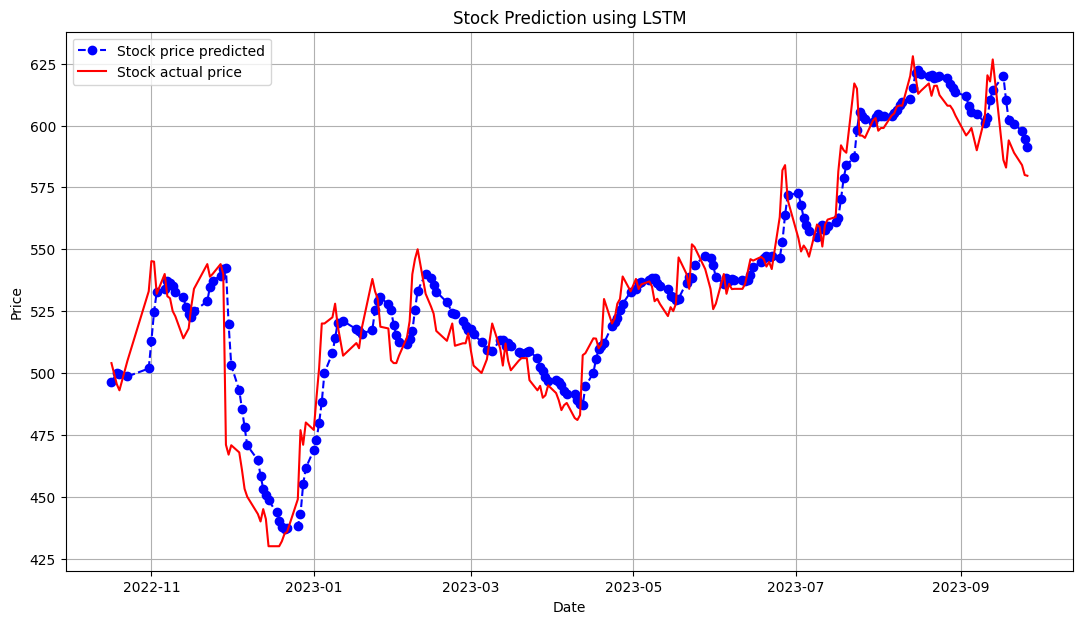

In [19]:
# Plot the results
plt.figure(figsize=(13, 7))
plt.grid(True)
date_range = df[to_row + seq_length:].index
plt.plot(date_range, y_pred, color='blue', marker='o', linestyle='dashed', label='Stock price predicted')
plt.plot(date_range, y_test, color='red', label='Stock actual price')
plt.title('Stock Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
mape=np.mean(np.abs(np.array(y_pred)-np.array(y_test))/np.abs(y_test))
print('MAPE: '+str(mape))

MAPE: 0.019213593778111927
